# Análise Exploratória de dados Socieconômicos

A análise de dados socioeconômicos é fundamental para qualquer empresa compreender o  cenário  social  e  econômico  para  o  ambiente  de  negócios,  compreender  as  diferenças  entre regiões, cidades e países, a influência de indicadores nas decisões de compra dos clientes e como as mudanças no cenáriopodem impactar as estratégias corporativas.

Neste    mini-projeto    são    aplicadas    técnicas    de    análise    exploratória em    dados socioeconômicos  reais  disponíveis  publicamente.  Por  se  tratar  de  dados  reais,  apresentam diversos problemas que são então tratados no processo de limpeza antes da análise. Para  a  análise,  os  dados  são  reorganizados  usando  uma  interessante  estratégia  de mudança de perspectiva dos dados. Então, 5 perguntas de negócio são respondidas através de gráficos e estatísticas.

>**Fonte de dados:** https://data.world/laurel/world-happiness-report-data

### Perguntas a serem respondidas:

- Pergunta 1: O aumento do PIB per capita de um país afeta positivamente a expectativa de vida dos cidadãos ao nascer?Qual a correlação entre essas duas variáveis?
- Pergunta 2: Existe uma correlação entre a escala de vida e a conscientização do público em geral sobre a corrupção nos negócios e no governo? Qual a correlação entre essas duas variáveis?
- Pergunta 3: O aumento na escala de vida tem algum efeito na média de felicidade entre o público em geral?Qual a correlação entre essas duas variáveis?
- Pergunta 4: O país com o menor índice de suporte social tem maior percepção de corrupção em relação às empresas e ao governo no país?
- Pergunta 5: Pessoas generosas são mais felizes?

**Referências:** Formação Cientista de dados (Data Science Academy: https://www.datascienceacademy.com.b)

In [38]:
# Ajustando as casas decimais
options(scipen = 999, digits = 2)

# Definir o espelho do CRAN
options(repos = 'http://cran.rstudio.com/')

# Definir as dimensões de saída de imagem
options(repr.plot.width = 20, repr.plot.height = 10)

In [ ]:
# Carregando os pacotes necessários
if(!require(pacman)) install.packages('pacman')
library(pacman)
pacman::p_load(dplyr, corrplot, ggplot2, data.table)

In [3]:
# Carregando o dataset
df <- readxl::read_excel('/content/dados_socio.xlsx')
df <- df[,2:12]

In [4]:
# Verificando as 10 primeiras observações
head(df)

country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2008,3.723590,7.197130,0.4506623,47.55044,0.7181143,0.1830619,0.8816863,0.5176372,0.2581955
Afghanistan,2009,4.401778,7.362664,0.5523084,47.85967,0.6788964,0.2046332,0.8500354,0.5839256,0.2370924
Afghanistan,2010,4.758381,7.416260,0.5390752,48.15951,0.6001272,0.1385288,0.7067661,0.6182655,0.2753238
Afghanistan,2011,3.831719,7.445761,0.5211036,48.45116,0.4959014,0.1761079,0.7311085,0.6113873,0.2671747
Afghanistan,2012,3.782938,7.549241,0.5206367,48.73835,0.5309350,0.2477128,0.7756198,0.7103847,0.2679191
Afghanistan,2013,3.572100,7.536999,0.4835519,49.02309,0.5779554,0.0751857,0.8232041,0.6205848,0.2733281


In [8]:
# Alterando as labels
novos_rotulos <- c('Pais','Ano','IndicadorNivelVida',
                 'PIB_per_capita','SuporteSocial',
                 'ExpectativaVida','IndicadorLiberdade',
                 'IndicadorGenerosidade'  ,'IndicadorCorrupcao',
                 'IndicadorEmocoesPositivas',
                 'IndicadorEmocoesNegativas')

colnames(df) <- novos_rotulos

In [9]:
# Verificando a dimensão
dim(df)

[1] 1420   11

In [10]:
# Verificando o tipo de dados
str(df)

tibble [1,420 × 11] (S3: tbl_df/tbl/data.frame)
 $ Pais                     : chr [1:1420] "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Ano                      : num [1:1420] 2008 2009 2010 2011 2012 ...
 $ IndicadorNivelVida       : num [1:1420] 3.72 4.4 4.76 3.83 3.78 ...
 $ PIB_per_capita           : num [1:1420] 7.2 7.36 7.42 7.45 7.55 ...
 $ SuporteSocial            : num [1:1420] 0.451 0.552 0.539 0.521 0.521 ...
 $ ExpectativaVida          : num [1:1420] 47.6 47.9 48.2 48.5 48.7 ...
 $ IndicadorLiberdade       : num [1:1420] 0.718 0.679 0.6 0.496 0.531 ...
 $ IndicadorGenerosidade    : num [1:1420] 0.183 0.205 0.139 0.176 0.248 ...
 $ IndicadorCorrupcao       : num [1:1420] 0.882 0.85 0.707 0.731 0.776 ...
 $ IndicadorEmocoesPositivas: num [1:1420] 0.518 0.584 0.618 0.611 0.71 ...
 $ IndicadorEmocoesNegativas: num [1:1420] 0.258 0.237 0.275 0.267 0.268 ...


In [11]:
# Transformando o ano em categórico
df$Ano <- as.factor(df$Ano)

In [13]:
# Analisando a quantidade de dados vazios
dados_ausentes <- sum(!complete.cases(df))
dados_ausentes

[1] 175

In [14]:
# Analisando a quantidade de dados completos
dados_completos <- sum(complete.cases(df))
dados_completos

[1] 1245

In [15]:
# Calculando a porcentagem de dados ausentes
porcentagem_ausente <- (dados_ausentes/dados_completos) * 100
porcentagem_ausente

[1] 14.05622

Como tomada de decisão, serão removidos as linhas NA

In [29]:
# Removendo os valores NA
df_ajustado <- na.omit(df)

In [30]:
# Analisando a nova dimensão
dim(df_ajustado)

[1] 1245   11

In [31]:
# Analisando os países únicos
pais_comNA <- length(unique(df$Pais))
pais_semNA <- length(unique(df_ajustado$Pais))

pais_comNA
pais_semNA

[1] 164

[1] 155

In [32]:
# Verificanco os países removidos
pais_comNA <- unique(df$Pais)
pais_semNA <- unique(df_ajustado$Pais)

setdiff(pais_comNA, pais_semNA)

[1] "China"             "Cuba"              "Malta"            
[4] "Myanmar"           "North Cyprus"      "Oman"             
[7] "Somalia"           "Somaliland region" "Turkmenistan"

Manteremos o dataset com os datas removidos, outra opção seria preencher os valores com estatísticas como média ou mediana, mas neste caso, não será realizado para não influências nos resultados.

In [33]:
# Analisando a quantidade de observações por ano
table(df_ajustado$Ano)


2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 
   1   75   95  102  108  114  134  122  122  127  124  121 

Removeremos os dados abaixo de 100, para que não haja dispersão das informações.

In [34]:
# Removendo as observações dos anos de 2005,2006 e 2007
df_ajustado <- df_ajustado[!df_ajustado$Ano %in% c(2005,2006,2007),]
head(df_ajustado)

Pais,Ano,IndicadorNivelVida,PIB_per_capita,SuporteSocial,ExpectativaVida,IndicadorLiberdade,IndicadorGenerosidade,IndicadorCorrupcao,IndicadorEmocoesPositivas,IndicadorEmocoesNegativas
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2008,3.723590,7.197130,0.4506623,47.55044,0.7181143,0.1830619,0.8816863,0.5176372,0.2581955
Afghanistan,2009,4.401778,7.362664,0.5523084,47.85967,0.6788964,0.2046332,0.8500354,0.5839256,0.2370924
Afghanistan,2010,4.758381,7.416260,0.5390752,48.15951,0.6001272,0.1385288,0.7067661,0.6182655,0.2753238
Afghanistan,2011,3.831719,7.445761,0.5211036,48.45116,0.4959014,0.1761079,0.7311085,0.6113873,0.2671747
Afghanistan,2012,3.782938,7.549241,0.5206367,48.73835,0.5309350,0.2477128,0.7756198,0.7103847,0.2679191
Afghanistan,2013,3.572100,7.536999,0.4835519,49.02309,0.5779554,0.0751857,0.8232041,0.6205848,0.2733281


In [35]:
# Separando as variáveis quantitativas
var_quantitativa <- sapply(df_ajustado, is.numeric)
df_ajustado_quantitativo <- df_ajustado[var_quantitativa]
str(df_ajustado_quantitativo)

tibble [1,074 × 9] (S3: tbl_df/tbl/data.frame)
 $ IndicadorNivelVida       : num [1:1074] 3.72 4.4 4.76 3.83 3.78 ...
 $ PIB_per_capita           : num [1:1074] 7.2 7.36 7.42 7.45 7.55 ...
 $ SuporteSocial            : num [1:1074] 0.451 0.552 0.539 0.521 0.521 ...
 $ ExpectativaVida          : num [1:1074] 47.6 47.9 48.2 48.5 48.7 ...
 $ IndicadorLiberdade       : num [1:1074] 0.718 0.679 0.6 0.496 0.531 ...
 $ IndicadorGenerosidade    : num [1:1074] 0.183 0.205 0.139 0.176 0.248 ...
 $ IndicadorCorrupcao       : num [1:1074] 0.882 0.85 0.707 0.731 0.776 ...
 $ IndicadorEmocoesPositivas: num [1:1074] 0.518 0.584 0.618 0.611 0.71 ...
 $ IndicadorEmocoesNegativas: num [1:1074] 0.258 0.237 0.275 0.267 0.268 ...
 - attr(*, "na.action")= 'omit' Named int [1:175] 19 22 23 34 35 36 37 38 50 83 ...
  ..- attr(*, "names")= chr [1:175] "19" "22" "23" "34" ...


In [36]:
# Verificando a correlação entre as variáveis
cor(df_ajustado_quantitativo)

,IndicadorNivelVida,PIB_per_capita,SuporteSocial,ExpectativaVida,IndicadorLiberdade,IndicadorGenerosidade,IndicadorCorrupcao,IndicadorEmocoesPositivas,IndicadorEmocoesNegativas
IndicadorNivelVida,1.0000000,0.77832401,0.6964394,0.73643548,0.5174677,0.23076121,-0.4279126,0.5630213,-0.25283838
PIB_per_capita,0.7783240,1.00000000,0.6639473,0.84872530,0.3551724,0.01001663,-0.3427820,0.3248439,-0.11823893
SuporteSocial,0.6964394,0.66394732,1.0000000,0.57204975,0.4309314,0.10128398,-0.2253724,0.4823029,-0.33519150
ExpectativaVida,0.7364355,0.84872530,0.5720498,1.00000000,0.3309750,0.06148185,-0.3204880,0.3113993,-0.07501938
IndicadorLiberdade,0.5174677,0.35517243,0.4309314,0.33097495,1.0000000,0.36891544,-0.4935976,0.6336795,-0.31615231
IndicadorGenerosidade,0.2307612,0.01001663,0.1012840,0.06148185,0.3689154,1.00000000,-0.2929835,0.4132843,-0.16122128
IndicadorCorrupcao,-0.4279126,-0.34278201,-0.2253724,-0.32048798,-0.4935976,-0.29298354,1.0000000,-0.3023205,0.29113947
IndicadorEmocoesPositivas,0.5630213,0.32484393,0.4823029,0.31139929,0.6336795,0.41328427,-0.3023205,1.0000000,-0.35609712
IndicadorEmocoesNegativas,-0.2528384,-0.11823893,-0.3351915,-0.07501938,-0.3161523,-0.16122128,0.2911395,-0.3560971,1.00000000


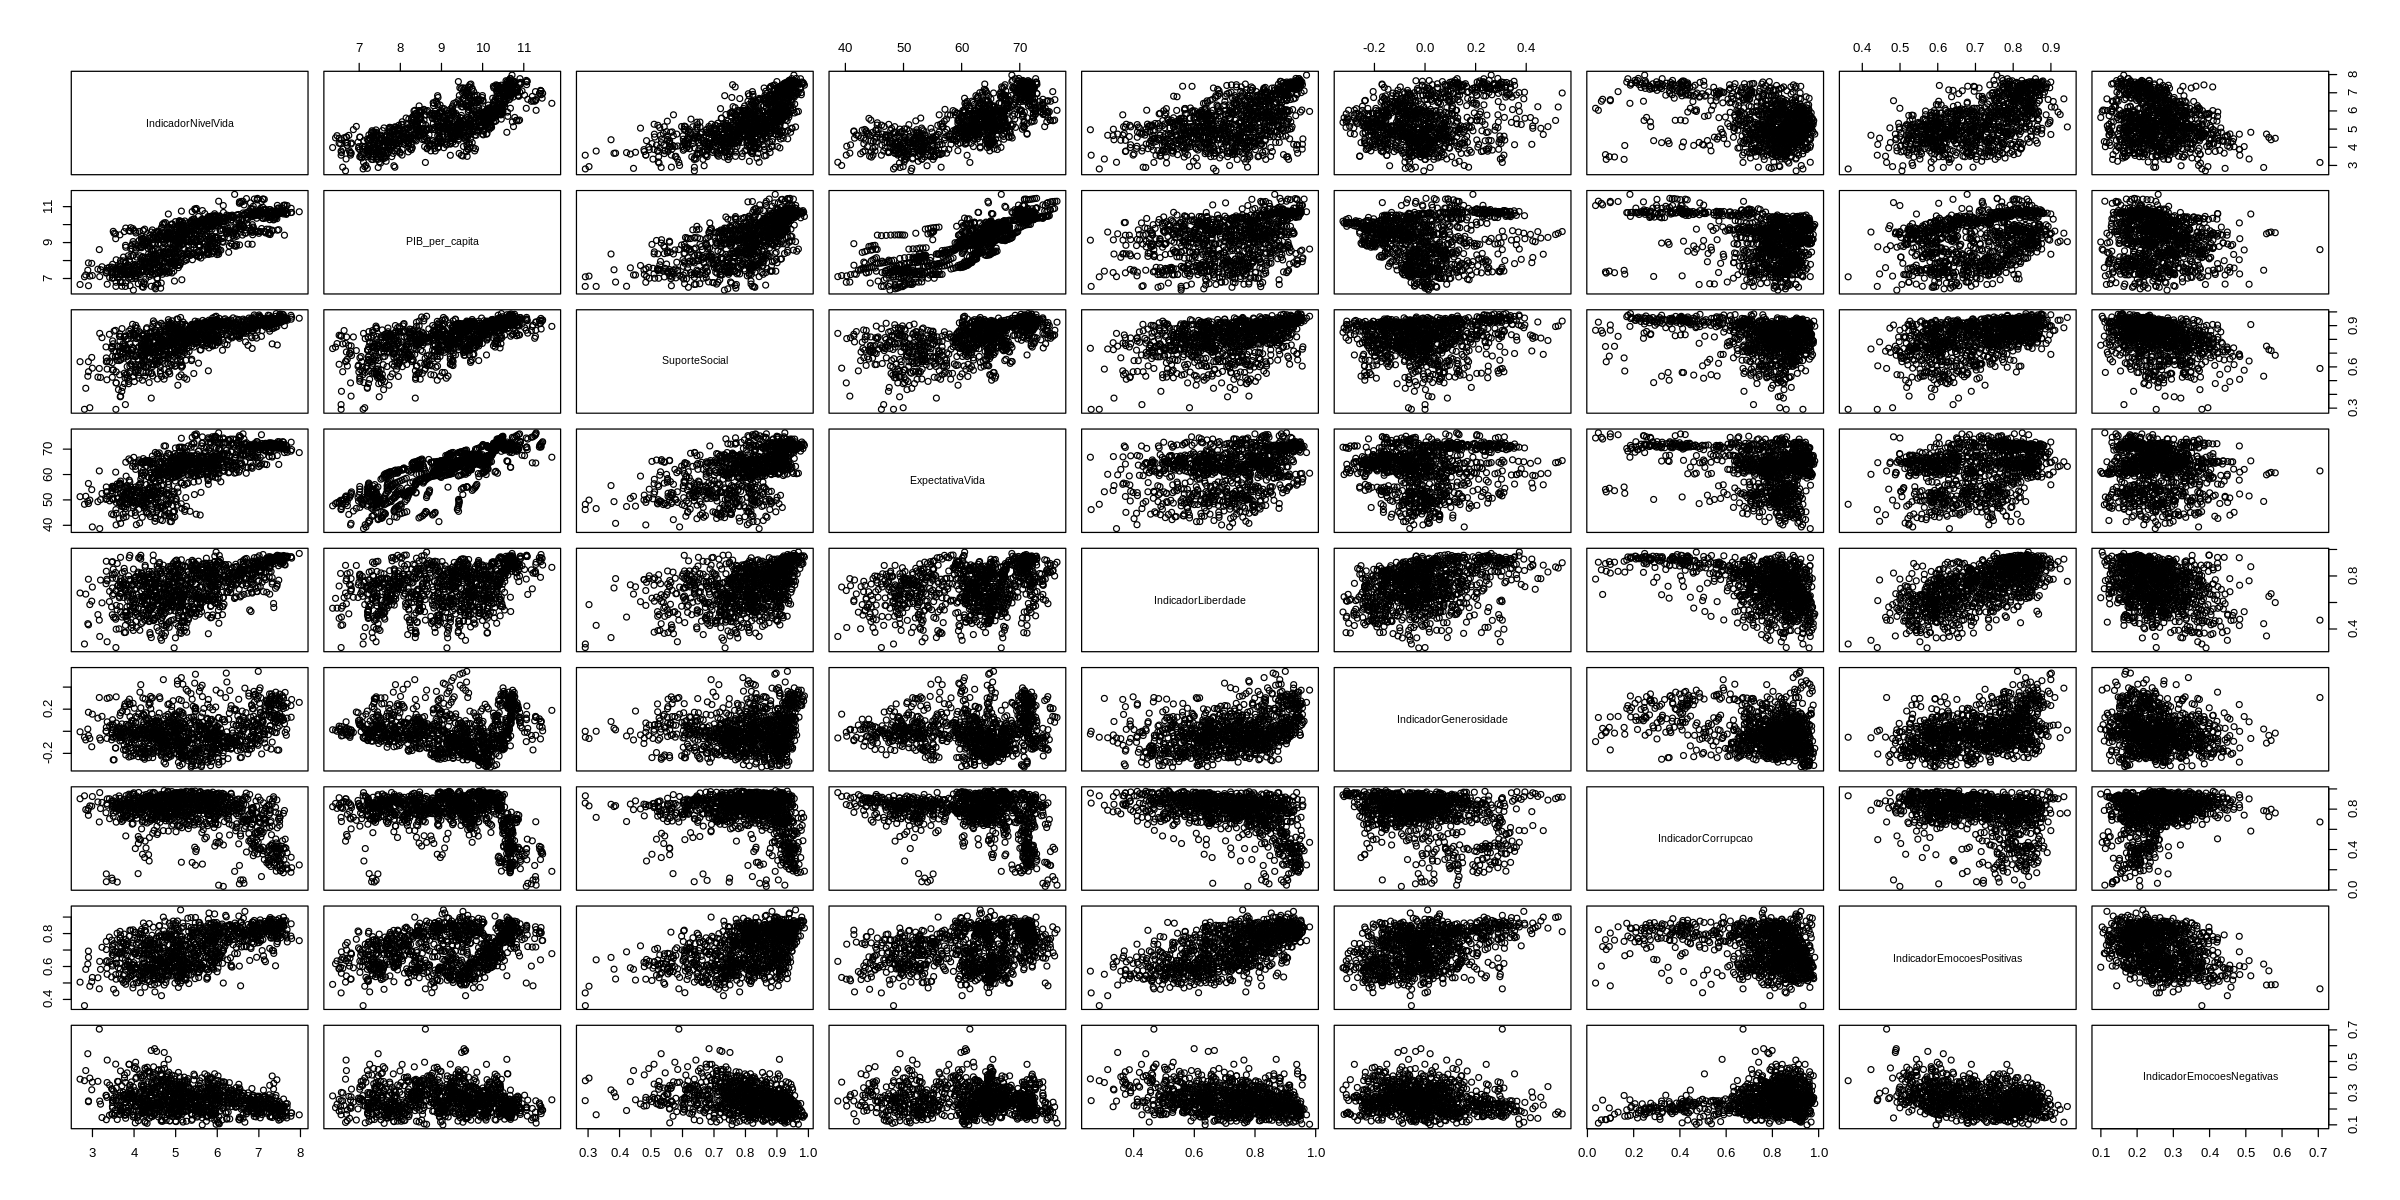

In [39]:
# Analisando em gráfico as correlações
pairs(df_ajustado_quantitativo)

In [42]:
# Criando um novo dataframe com as médias das variáveis
df_ajustado_dt <- data.table(df_ajustado)

In [50]:
names(df_ajustado_dt)

[1] "Pais"                      "Ano"                      
 [3] "IndicadorNivelVida"        "PIB_per_capita"           
 [5] "SuporteSocial"             "ExpectativaVida"          
 [7] "IndicadorLiberdade"        "IndicadorGenerosidade"    
 [9] "IndicadorCorrupcao"        "IndicadorEmocoesPositivas"
[11] "IndicadorEmocoesNegativas"

In [51]:
# Criando um novo dataframe com as médias
df_ajustado_dt <- df_ajustado_dt[,
                                  .('IndicadorNivelVida' = mean(IndicadorNivelVida),
                                    'PIB_per_capita' = mean(PIB_per_capita),
                                    'SuporteSocial' = mean(SuporteSocial),
                                    'ExpectativaVida' = mean(ExpectativaVida),
                                    'IndicadorLiberdade' = mean(IndicadorLiberdade),
                                    'IndicadorGenerosidade' = mean(IndicadorGenerosidade),
                                    'IndicadorCorrupcao' = mean(IndicadorCorrupcao),
                                    'IndicadorEmocoesPositivas' = mean(IndicadorEmocoesPositivas),
                                    'IndicadorEmocoesNegativas' = mean(IndicadorEmocoesNegativas)
                                  ),
                                  by = Pais]

In [53]:
# Verificando as 10 primeiras observações
head(df_ajustado_dt)

Pais,IndicadorNivelVida,PIB_per_capita,SuporteSocial,ExpectativaVida,IndicadorLiberdade,IndicadorGenerosidade,IndicadorCorrupcao,IndicadorEmocoesPositivas,IndicadorEmocoesNegativas
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,3.9,7.4,0.52,49,0.56,0.144,0.81,0.59,0.29
Albania,5.1,9.2,0.72,68,0.62,-0.119,0.86,0.65,0.31
Algeria,5.5,9.5,0.82,64,0.56,-0.203,0.66,0.58,0.24
Angola,4.4,8.8,0.74,45,0.46,-0.084,0.87,0.61,0.35
Argentina,6.4,9.7,0.91,66,0.72,-0.131,0.84,0.84,0.25
Armenia,4.4,8.9,0.70,65,0.50,-0.188,0.90,0.54,0.43


In [54]:
# Verificando as novas informações
summary(df_ajustado_dt)

     Pais           IndicadorNivelVida PIB_per_capita SuporteSocial 
 Length:154         Min.   :3.2        Min.   : 6.5   Min.   :0.40  
 Class :character   1st Qu.:4.5        1st Qu.: 8.2   1st Qu.:0.74  
 Mode  :character   Median :5.2        Median : 9.3   Median :0.82  
                    Mean   :5.4        Mean   : 9.2   Mean   :0.80  
                    3rd Qu.:6.2        3rd Qu.:10.1   3rd Qu.:0.90  
                    Max.   :7.7        Max.   :11.7   Max.   :0.98  
 ExpectativaVida IndicadorLiberdade IndicadorGenerosidade IndicadorCorrupcao
 Min.   :40      Min.   :0.40       Min.   :-0.30         Min.   :0.10      
 1st Qu.:55      1st Qu.:0.62       1st Qu.:-0.10         1st Qu.:0.71      
 Median :63      Median :0.73       Median :-0.01         Median :0.81      
 Mean   :61      Mean   :0.72       Mean   : 0.00         Mean   :0.75      
 3rd Qu.:67      3rd Qu.:0.82       3rd Qu.: 0.07         3rd Qu.:0.87      
 Max.   :75      Max.   :0.95       Max.   : 0.45      

### Respondendo as perguntas de Negócios

Pergunta 1: O aumento do PIB per capita de um país afeta positivamente a expectativa de vida dos cidadãos ao nascer?Qual a correlação entre essas duas variáveis?

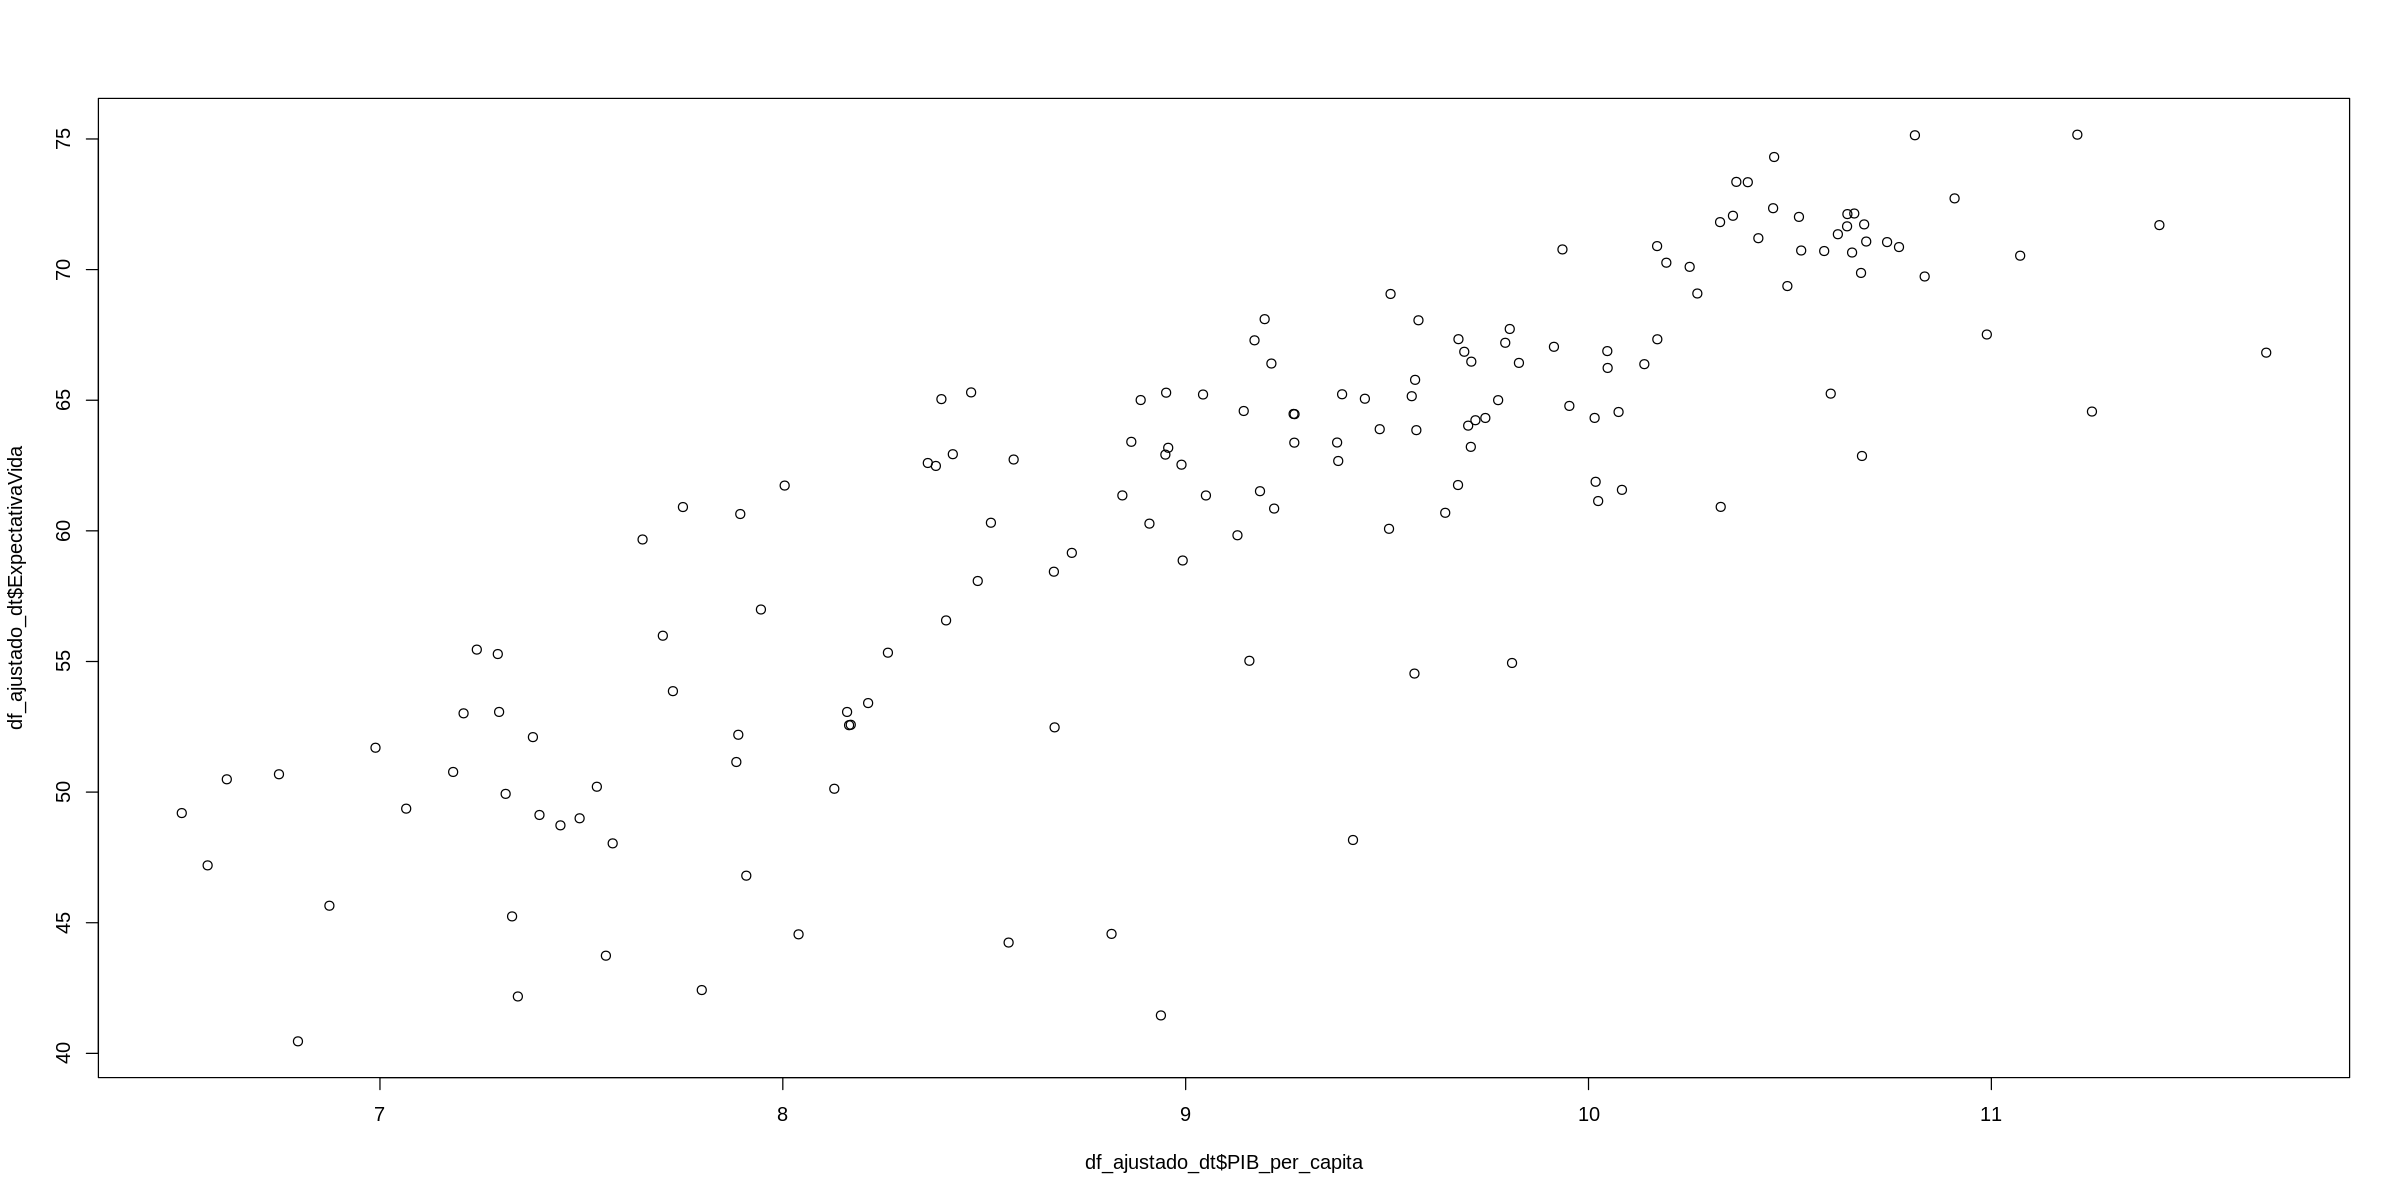

In [55]:
# Visualizando o scatterplot
plot(df_ajustado_dt$PIB_per_capita, df_ajustado_dt$ExpectativaVida)

In [59]:
# Verificando o valor da correlação
cor.test(df_ajustado_dt$PIB_per_capita, df_ajustado_dt$ExpectativaVida, method = 'pearson')


	Pearson's product-moment correlation

data:  df_ajustado_dt$PIB_per_capita and df_ajustado_dt$ExpectativaVida
t = 18, df = 152, p-value <0.0000000000000002
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.77 0.87
sample estimates:
 cor 
0.83 


Nota-se que à medida que o PIB aumenta, a expectativa de vida tende a aumentar também, apresentando uma correlação positiva de 0.83. Lembrando que a correlação não necessariamente é a causa, mas é um dos fatores para a direção.

---

Pergunta 2: Existe uma correlação entre a escala de vida e a conscientização do público em geral sobre a corrupção nos negócios e no governo? Qual a correlação entre essas duas variáveis?

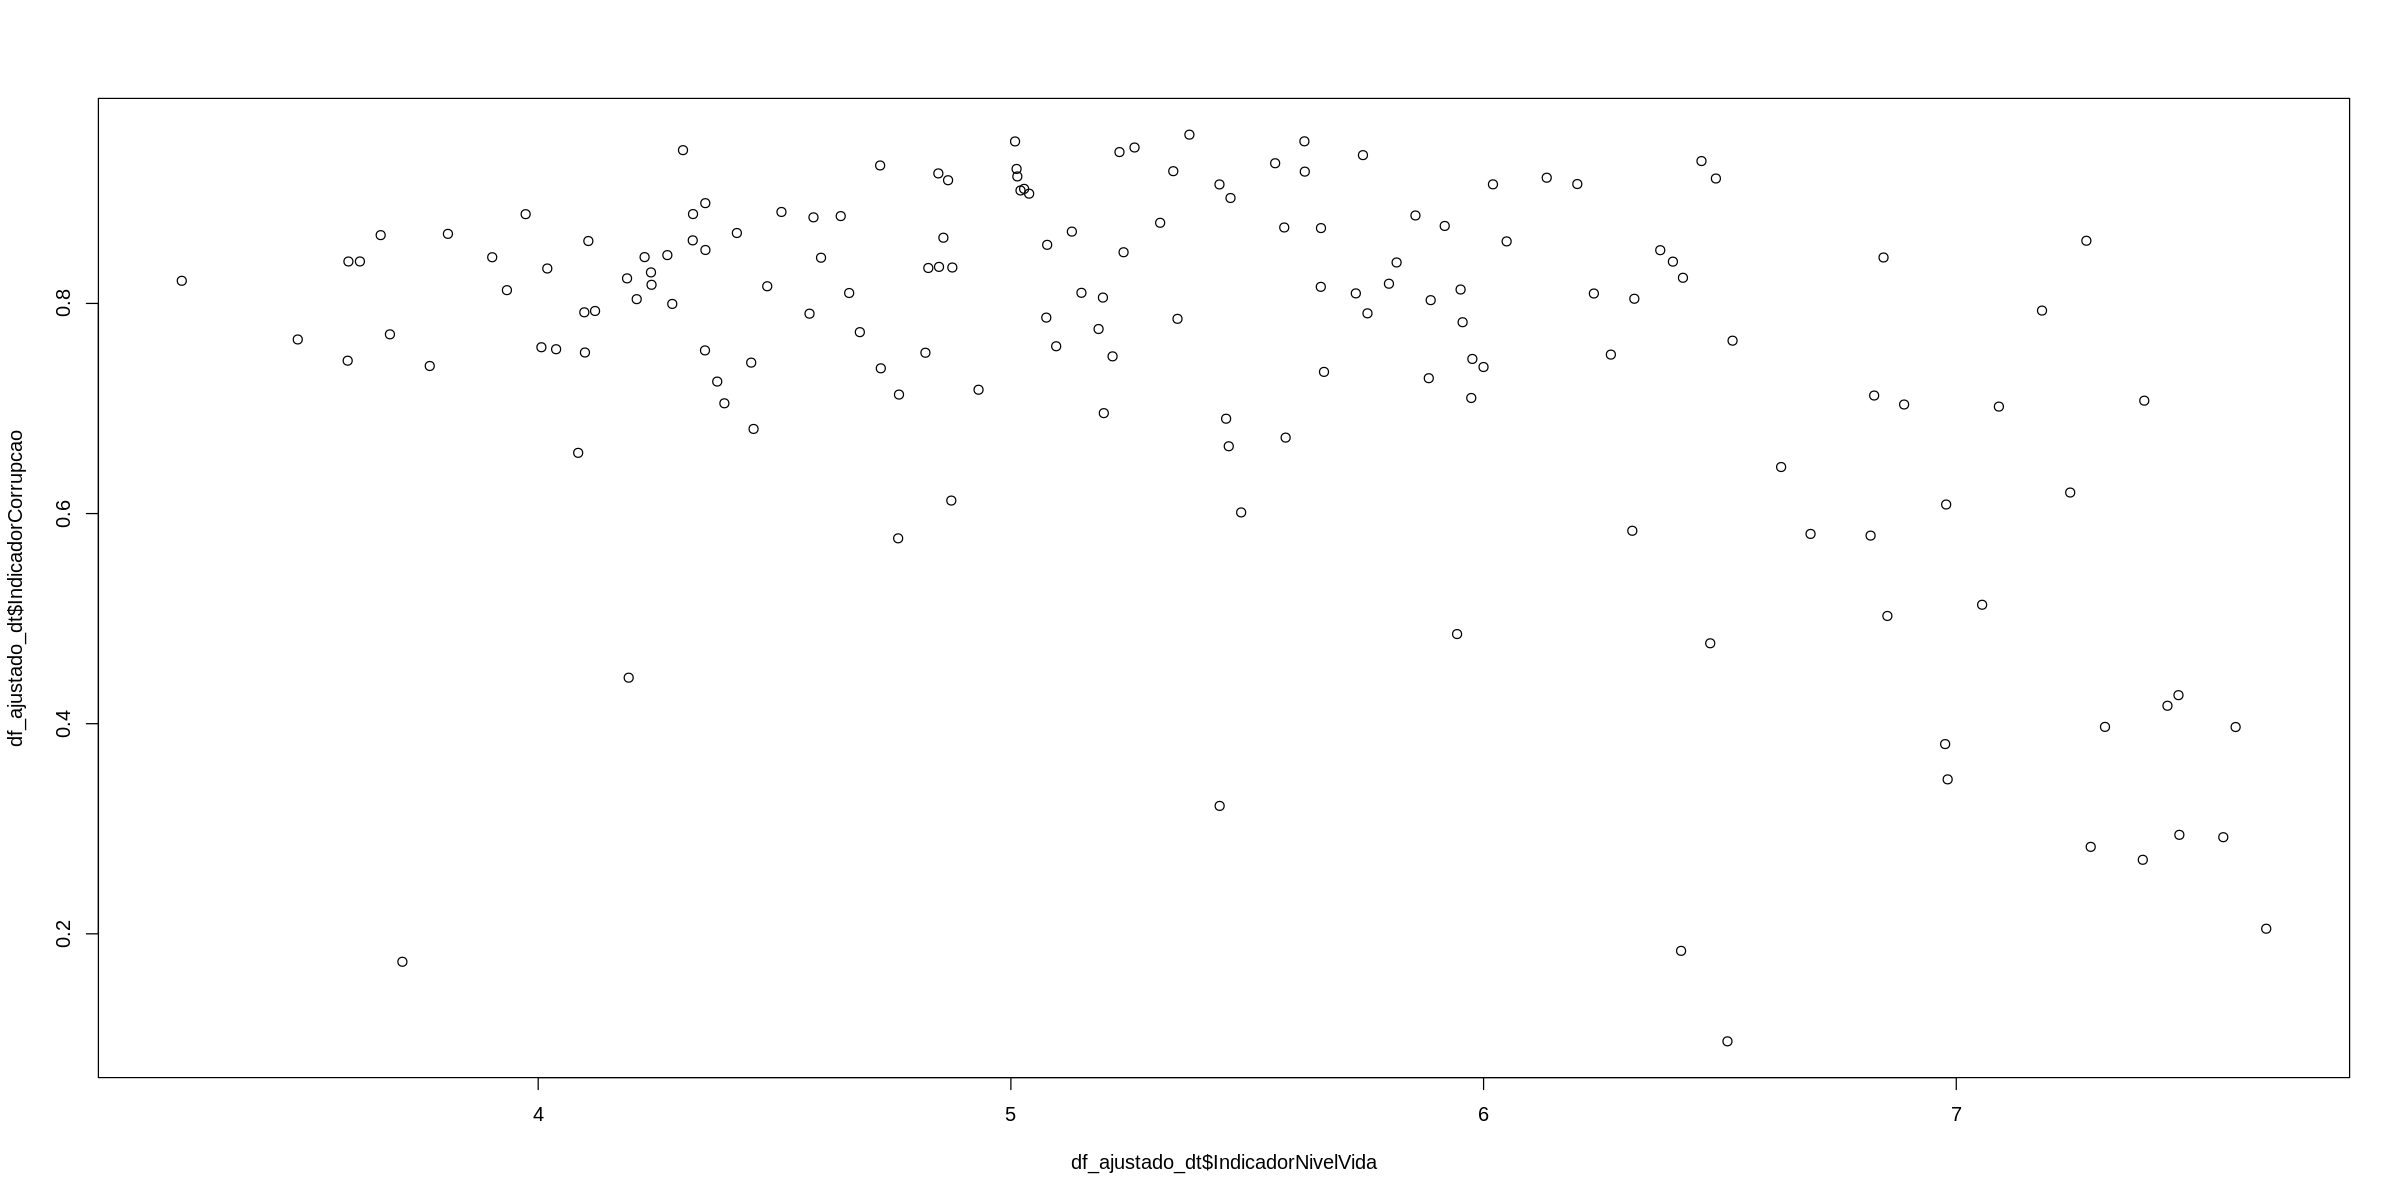

In [58]:
# Visualizando o scatterplot
plot(df_ajustado_dt$IndicadorNivelVida, df_ajustado_dt$IndicadorCorrupcao)

In [60]:
# Verificando o valor da correlação
cor.test(df_ajustado_dt$IndicadorNivelVida, df_ajustado_dt$IndicadorCorrupcao, method = 'pearson')


	Pearson's product-moment correlation

data:  df_ajustado_dt$IndicadorNivelVida and df_ajustado_dt$IndicadorCorrupcao
t = -6, df = 152, p-value = 0.000000004
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.57 -0.32
sample estimates:
  cor 
-0.45 


Nota-se que há correlação, porém negativa (-0.45). À medida que o nível de vida aumenta, a variável de indicação de corrupção diminui.

---
Pergunta 3: O aumento na escala de vida tem algum efeito na média de felicidade entre o público em geral?Qual a correlação entre essas duas variáveis?

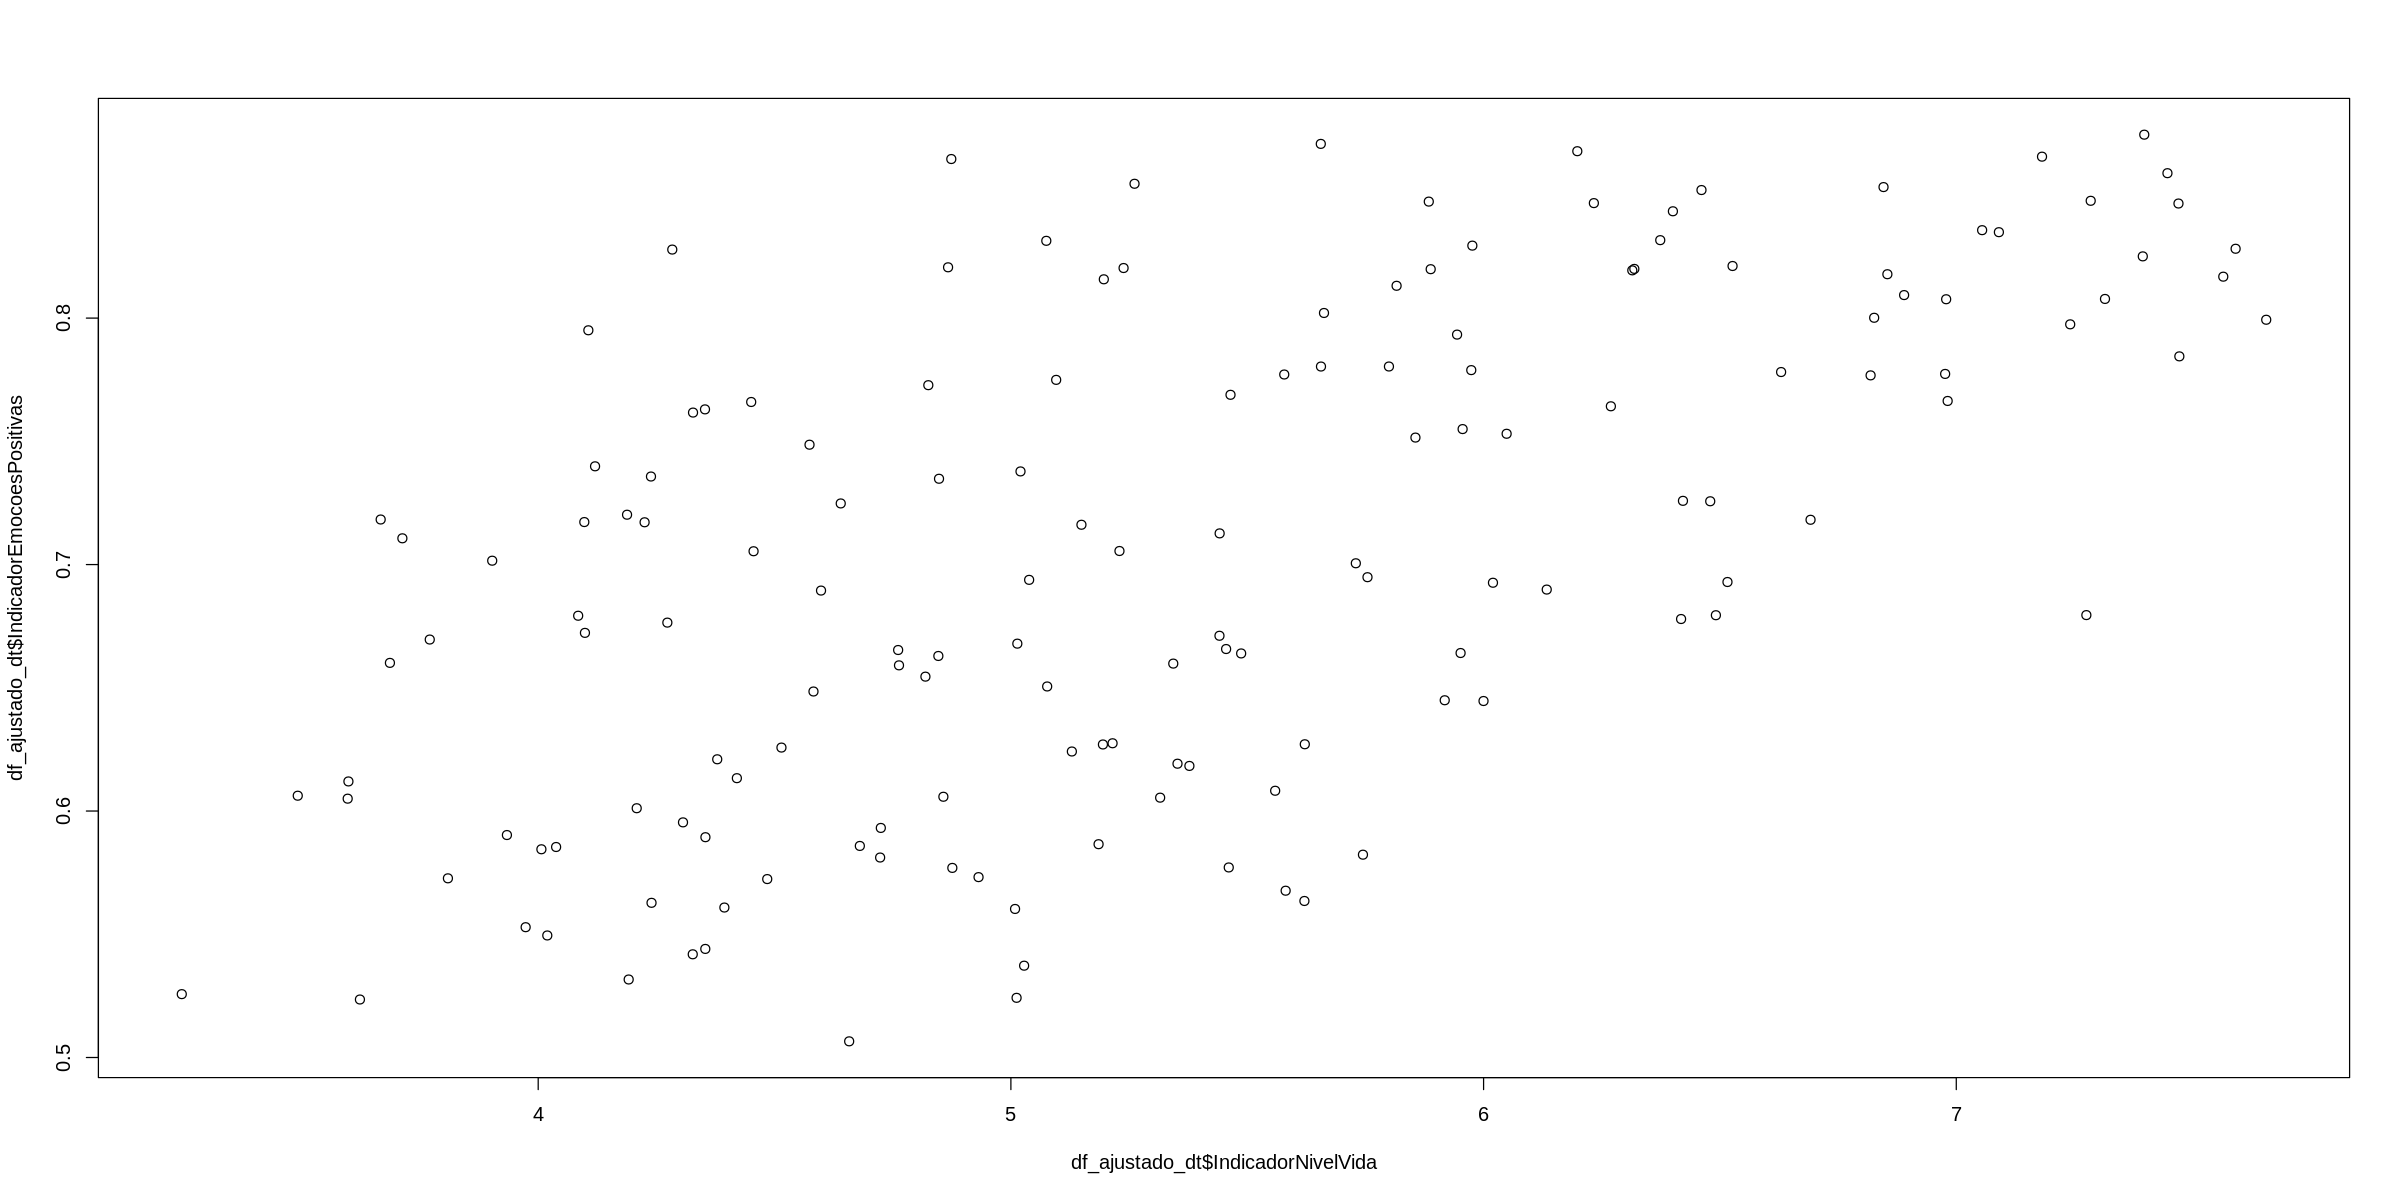

In [61]:
# Visualizando o scatterplot
plot(df_ajustado_dt$IndicadorNivelVida, df_ajustado_dt$IndicadorEmocoesPositivas)

In [62]:
# Verificando o valor da correlação
cor.test(df_ajustado_dt$IndicadorNivelVida, df_ajustado_dt$IndicadorEmocoesPositivas, method = 'pearson')


	Pearson's product-moment correlation

data:  df_ajustado_dt$IndicadorNivelVida and df_ajustado_dt$IndicadorEmocoesPositivas
t = 9, df = 152, p-value <0.0000000000000002
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5 0.7
sample estimates:
 cor 
0.61 


Nota-se que há uma correlação positiva entre as variáveis (0.61). O nível de vida aumenta e a tendência da emoção positiva (felicidade) é aumentar também.

---
Pergunta 4: O país com o menor índice de suporte social tem maior percepção de corrupção em relação às empresas e ao governo no país?

In [63]:
# País com menor índice de suporte social
df_ajustado_dt[df_ajustado_dt$SuporteSocial == min(df_ajustado_dt$SuporteSocial),]

Pais,IndicadorNivelVida,PIB_per_capita,SuporteSocial,ExpectativaVida,IndicadorLiberdade,IndicadorGenerosidade,IndicadorCorrupcao,IndicadorEmocoesPositivas,IndicadorEmocoesNegativas
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Burundi,3.5,6.6,0.4,47,0.4,-0.02,0.77,0.61,0.21


In [70]:
# Verificando a relação entre o indicador de corrupção do Burundi
df_ajustado_dt[df_ajustado_dt$SuporteSocial == min(df_ajustado_dt$SuporteSocial),]$IndicadorCorrupcao
max(df_ajustado$SuporteSocial)

[1] 0.77

[1] 0.99

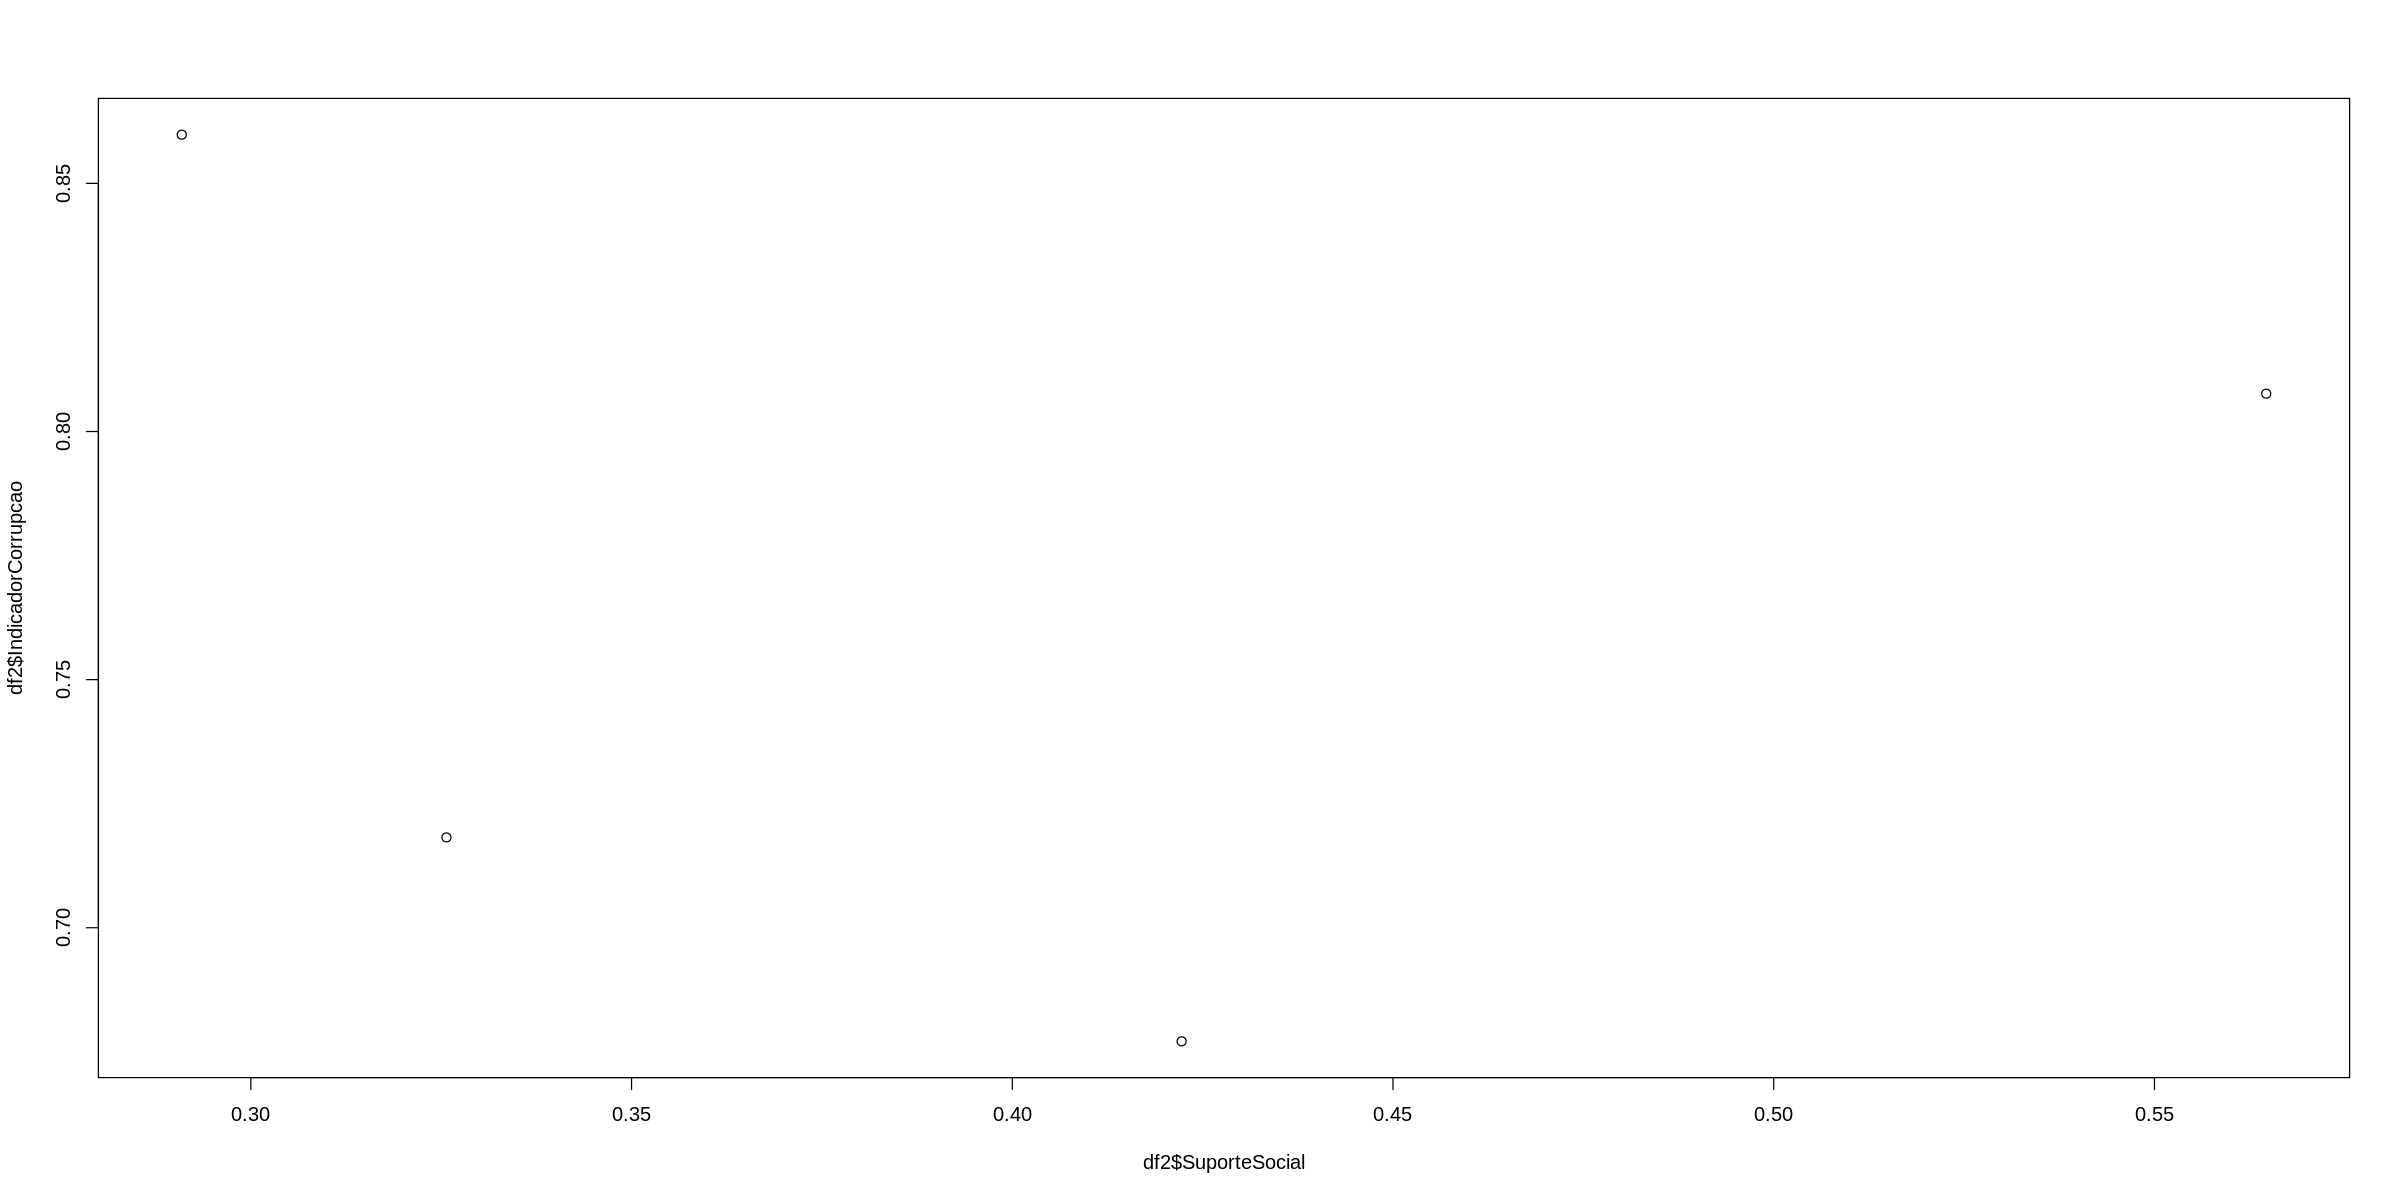

In [68]:
# Visualização em gráfico
df2 <- df[df$Pais == 'Burundi',]
plot(df2$SuporteSocial, df2$IndicadorCorrupcao)

In [69]:
# Verificando o valor da correlação
cor.test(df2$SuporteSocial, df2$IndicadorCorrupcao, method = 'pearson')


	Pearson's product-moment correlation

data:  df2$SuporteSocial and df2$IndicadorCorrupcao
t = -0.08, df = 2, p-value = 0.9
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.97  0.96
sample estimates:
   cor 
-0.059 


Não há uma correlação entre o suporte social e os indicadores de corrupção.

---
Pergunta 5: Pessoas generosas são mais felizes?

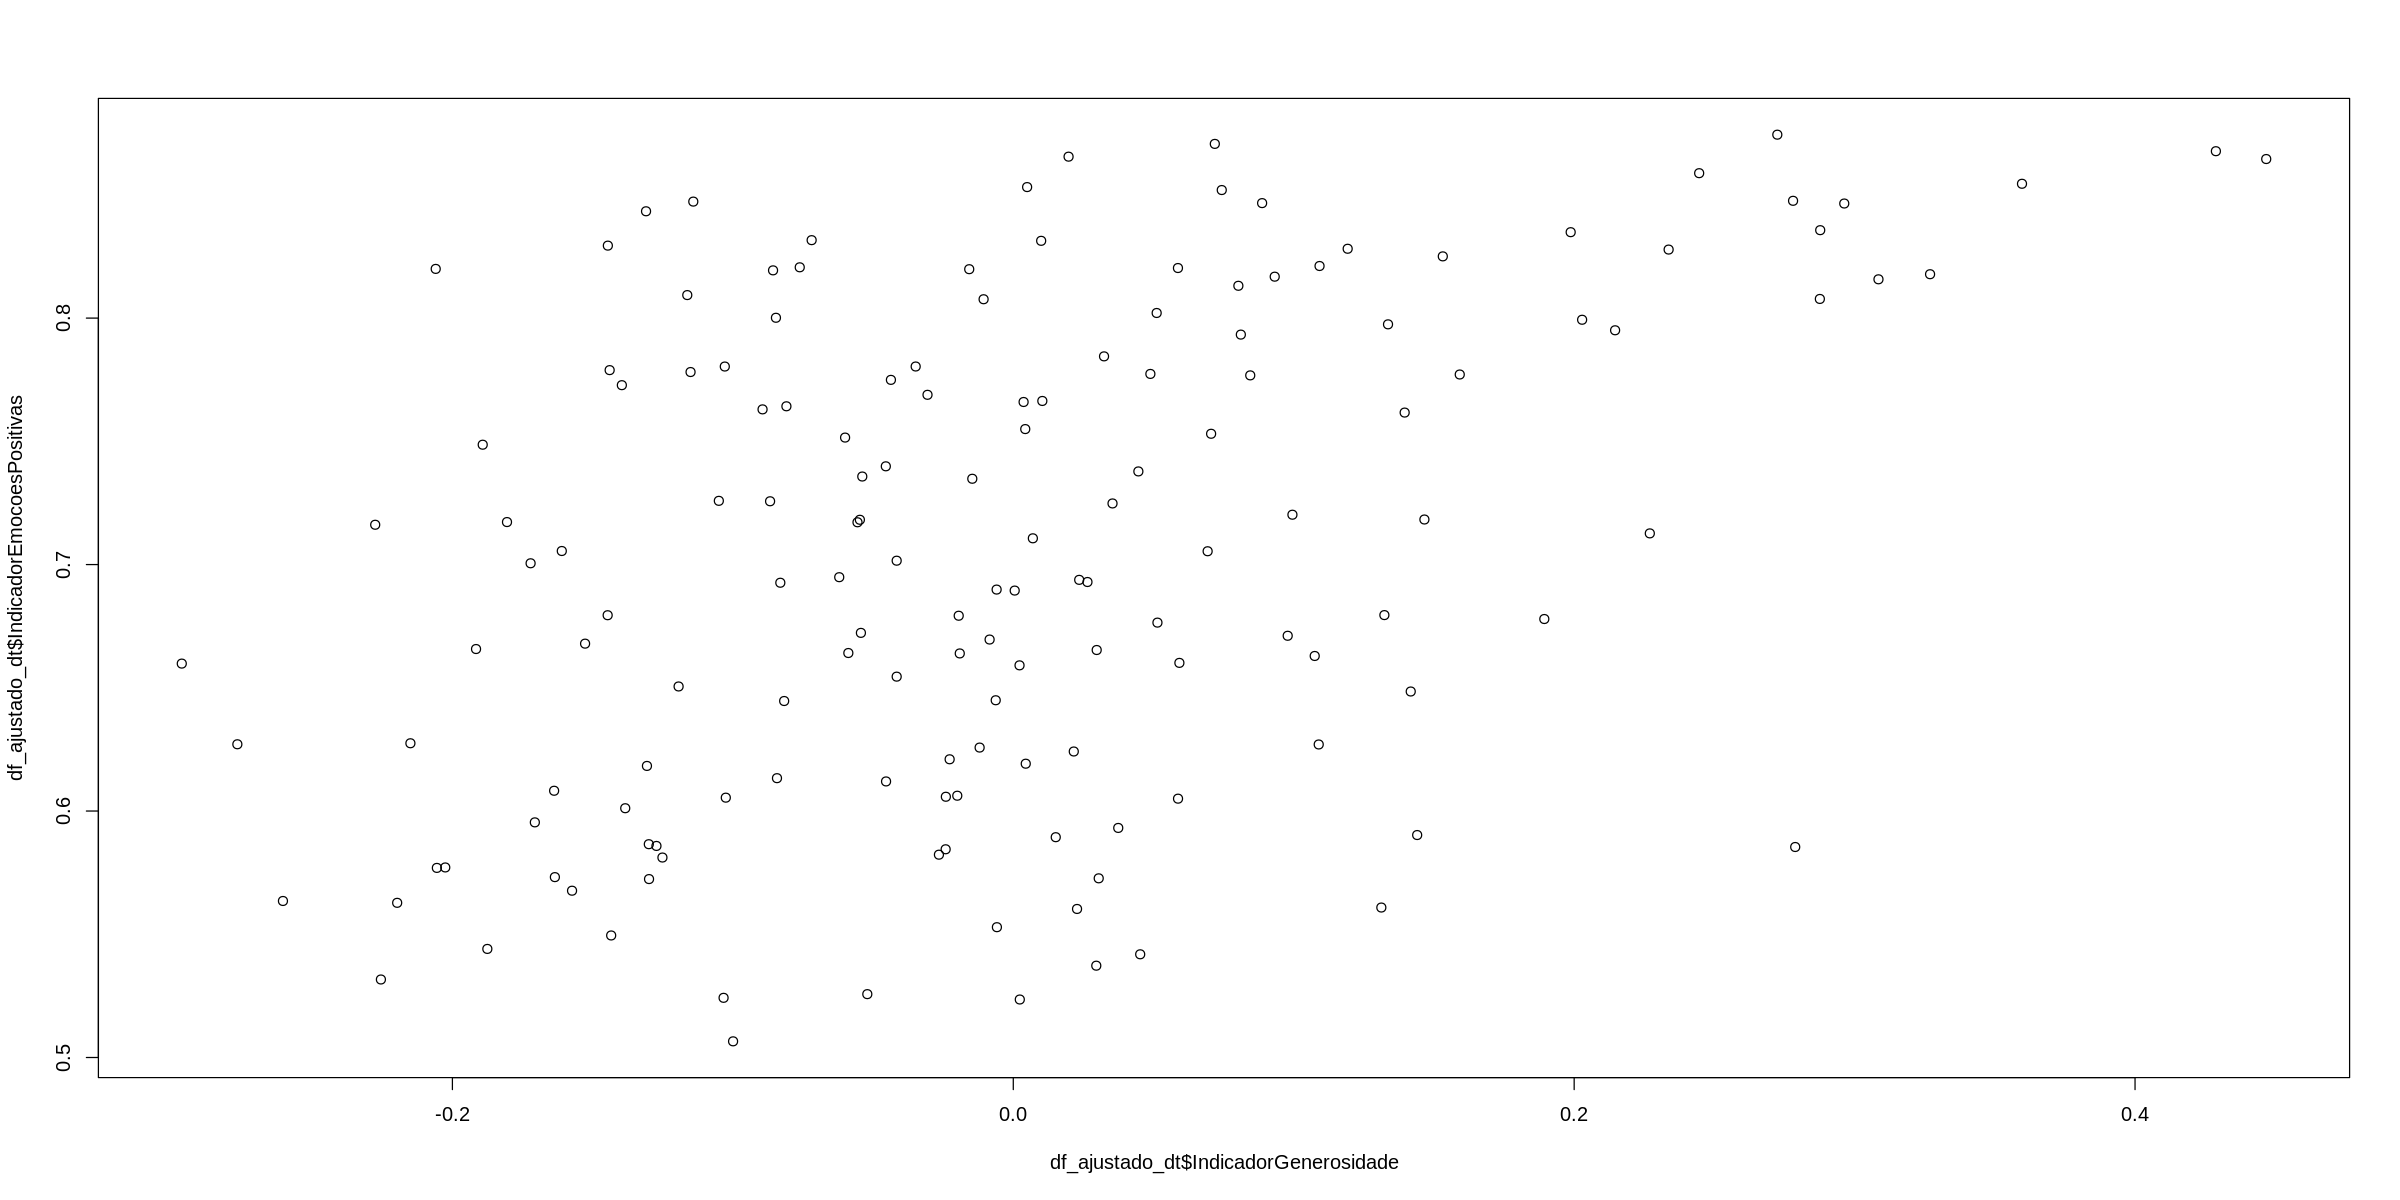

In [71]:
# Visualizando o scatterplot
plot(df_ajustado_dt$IndicadorGenerosidade, df_ajustado_dt$IndicadorEmocoesPositivas)

In [72]:
# Verificando o valor da correlação
cor.test(df_ajustado_dt$IndicadorGenerosidade, df_ajustado_dt$IndicadorEmocoesPositivas, method = 'pearson')


	Pearson's product-moment correlation

data:  df_ajustado_dt$IndicadorGenerosidade and df_ajustado_dt$IndicadorEmocoesPositivas
t = 6, df = 152, p-value = 0.00000001
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.30 0.56
sample estimates:
 cor 
0.44 


Há uma correlção positiva (0.44) média entre os indicadores de generosidade e felicidades.

### FIM!